In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
# import functions from the modsim.py module
from modsim import *

# Background

White dwarf 'stars' are the remnants of a standard star (0.5 to 8 times the size of our own sun). These constitute the majoraty of the stars in the universe. For most of it's life, a star like this fuses hydrogen into helium emmiting light as a result. As the star uses up its hydrogen the energy from the fusionin the star becomes weaker. This energy is what resists the star collapsing due to its own gravity. As the energy dwindles, the star shrinks which causes the temperatures in the core of the star to increase. Gradually it will beome hot enough in the core of the sun to fuse helium. Helium starts to fuse and increases the fusion pressure of the star causing the star to expand greatly. The star then enters its red giant phase of its life. Helium is fused into carbon and oxygen, but average stars can never get hot enough to fuse carbon. 
As the helium is used up the star contracts again. however as it contracts, left over helium and hydrogen re-ignite with the increase in heat. This flings the layers outward expanding the star and cooling the center temperature. Fusion stopss and the star collapses again. Tis is the star's final stage in life where the size of the star oscelates with the outer layers bouncing off the center core. The oscilations get larger and larger as the layers of the star bounce off of eachother. This process continues untill the star flings its outer layers so far out that they do not gravatationally condense again. This leaves the superhot superdense core of carbon(and a bit of oxygen) which could not be fused. 
This core is called a white dwarf star (it is called this because it glows a bright white because of residual heat but it is not fusing to create more energy hense it is a 'dwarf star.') The white dwarf radiates its heat away gradually. While it is hot the white dwarf contains enough energy to keep its atoms as an ionized superdense plazma; However, as the energy radiates away the structure crystalizes. The properties of this crystal structure are unknown, but the composition has been likened to diamond (this is not entirely accurate as it is much denser and it contains a significant proportion of oxygen however it is an apt comparason as it demonstrates the possible usefulness of the resultant material).

# Question


How long will it take for a white dwarf star to cool to a harvestable temperature?

# Model

## Useful Functions

In [2]:
def surface_area(mass, density, constants):
    """this function calculates the surface area for a sphere of a given material and uniform composition
    mass is the mass of the sphere
    density is the duniform density of the material (kg/m^3)
    constants is a system object containing fundamental constants"""
    
    #calculates the volume of the material
    volume = mass/density
    
    #converts the volume to a sphere and finds the radius
    radius = (volume/(4/3)/constants.pi)**(1/3)
    
    #returns the surface area of the sphere
    return 4*constants.pi*(radius**2)

## State and System

The system and the state are described below. The state holds the curent value of the state of the white dwarf star in the simulation.The system object holds system parameters and fundamental physics constants. the surface area of the star was calculated using the above surface area function and the result was placed into the system to avoid overwriing system values.

In [3]:
"""this code creates a the state of the system
star_temp is the themperature of the star"""
#creates the state of the function
state = State(star_temp = 25000)

"""creates a system with innital values and constants
init is the innital state function
emmisivity is an innate property of the materials involved. White dwarfs emmit radiation in a near perfict manner which correlates to them having an emmisivity value of very close to 1
density is the density of the white dwarf in kg/m^3 and is found by multiplying the density of the sun (1410) times 92,000
c is the speed of light
sigma is the Stefan–Boltzmann constant which describes radiative cooling
k is the Boltzmann constant (different from sigma) which describes the conversion of temperature to internal energy
avagadro is avagadro's constant which is representative of the number of particles in a mol
solarmass is the mass of our sun
carbon_mass_per_mol gives the mass of one mol of carbon in kg/mol
pi is the circle constant of mathmatics
star_mass is the mass of the white dwarf which is 1.018* the mass of our sun
surf_area is the surface area of the star"""
sys = System(init = state,
            emissivity  = 1,
            density = 92000*1410,
            c = 3*10**(8),
            sigma = 5.6703*10**(-8),
            k = 1.380649*10**(-23), 
            avagadro = 6.022140857*10**(23),
            solar_mass = 1.98847*10**40,
            solar_density = 1410,
            carbon_mass_per_mol = 12.011 *10**(-3),
            pi = 3.1415926535,
            year = 31557600,
            t_0 = 0,
            t_end = 31557600*10**15,
            env_temp = 2.7,
            star_mass = 1.018*1.98847*10**40,
            surf_area = 1.401707440331564e+22)

## update function

Because of the complex nature of the white dwarf stars we abstracted the model to a simple model of a sphere of uniform solid density cooling via radiative cooling. To show robustness and prove that this is still a useful model of a white dwarf, two different models were created which used this central assumption.


### Differential equation with einstein solids

For our first model, we started with a differential equation for raditative cooling.

$ \frac{dE_{star}}{dtime}=\epsilon*\sigma*A_{surface}*(T_{star}^4 - T_{environmant}^4)$

We combined this equation tith an expression for internal energy in terms of temperature based on an einstein solid.
This method approximates the vibration of each particle as a quantum harmonic oscillator (a particle which is bounded to a set space and oscilates around that space in accordance with the laws of quantum mechanics). The internal energy is then equated as the sum of these vibrations and mathmatically simplified to the equation below. 

$E_{internal} = N_{particles}*k*T$

A brief note about einstein solids, they are a very good approximation for the internal energy of a solid in terms of the temperature of the solid because particles in a solid are restricted in such a way that they do behave as near idealized quantum harmonic oscilators. This method was also chosen over the standard specific heat method of converting internal energy to temperature, because specific heat assumes a constantspecific heat independient of temperature which is accurate until high temperatures (like those in recently formed white dwarfs). Also the specific heat of white dwarf material has not yet been measured.

The number of particles was found by using standard molar conversions. For the sake of this calculation we assumed that a white dwarf is constituted entirely of carbon (no specific data on the percent compositions of white dwarfs could be found however there is a concensus that white dwarfs are mostly carbon with a proportion of oxygen which could cause this modeling approximation to be inaccurate)

$N_{particles} = \frac{mass}{carbon_{\frac{mass}{mol}}}*N_{a}$

Thus the final differential equation is the following where $N_{a}$ is avogadro's constant and $k$ is the boltzman constant

$ \frac{dT_{star}}{dtime}=\frac{\epsilon*\sigma*A_{surface}*(T_{star}^4 - T_{environmant}^4)}{\frac{mass}{carbon_{\frac{mass}{mol}}}*N_{a}*k}$

This diferential equation was then used to create a slope function

In [9]:
def e_solid_slope_func(state,time, sys):
    star_temp = state
    #converts the differential equation for the temperature into code
    dstar_tempdt = -(sys.emissivity*sys.sigma*sys.surf_area*(star_temp**4 - sys.env_temp**4))/(((sys.star_mass/sys.carbon_mass_per_mol)*sys.avagadro)*sys.k)
    #updates the temperature
    return dstar_tempdt

# Results

The results for the first model are shown below. The simulation was run by an ODE solver to optimize the time steps that were taken.

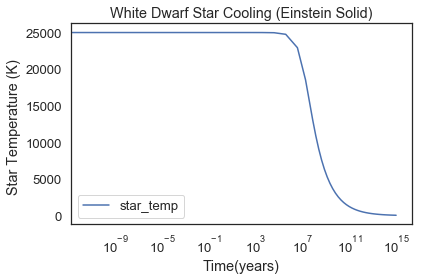

In [11]:
#runs the simulation with an ODE solver
results,details = run_ode_solver(sys,e_solid_slope_func)

#Converts the time indexes from years into seconds
results.index /= sys.year

#plots the results
results.plot()

#decorates the plot and turns it tnto a semilog plot
decorate (xscale = "log", xlabel = "Time(years)", ylabel = "Star Temperature (K) ", title = "White Dwarf Star Cooling (Einstein Solid)")

# Interperitation

# Abstract

# resources

Temperature of space
https://en.wikipedia.org/wiki/Outer_space

Black body emmisivity
http://whitedwarf.org/theses/gaensicke.pdf

Innital conditions based on Sirius B
https://en.wikipedia.org/wiki/Sirius

Radiative cooling equation
http://hyperphysics.phy-astr.gsu.edu/hbase/thermo/cootime.html

Einstein solid equations
http://hyperphysics.phy-astr.gsu.edu/hbase/Therm/einsol.html#c1

White dwarf crystialization:
https://imagine.gsfc.nasa.gov/science/objects/dwarfs2.html